<a href="https://colab.research.google.com/github/Christoputhanpurackal/machine-learning/blob/main/strokenew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [2]:
data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head(5110)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

<ipython-input-7-61f244737ba1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [8]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [9]:
data.head(1
          )

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


<Axes: xlabel='age', ylabel='Count'>

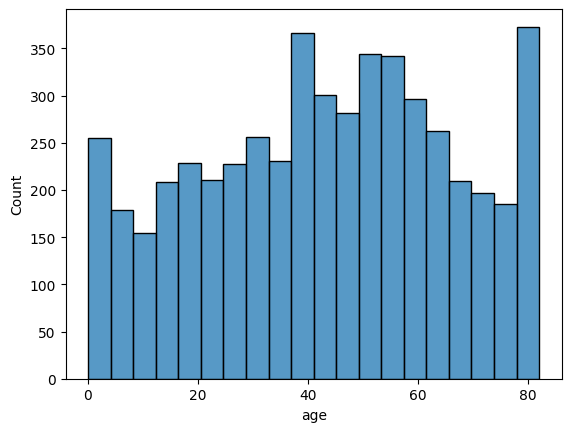

In [10]:
sns.histplot(data['age'])

<Axes: xlabel='bmi', ylabel='Count'>

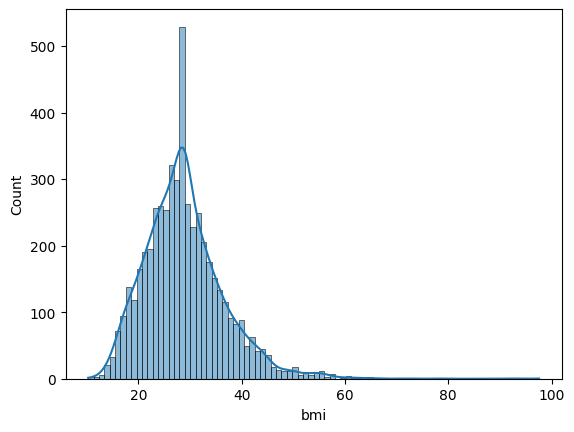

In [15]:
sns.histplot(data['bmi'],kde=True)

In [14]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])

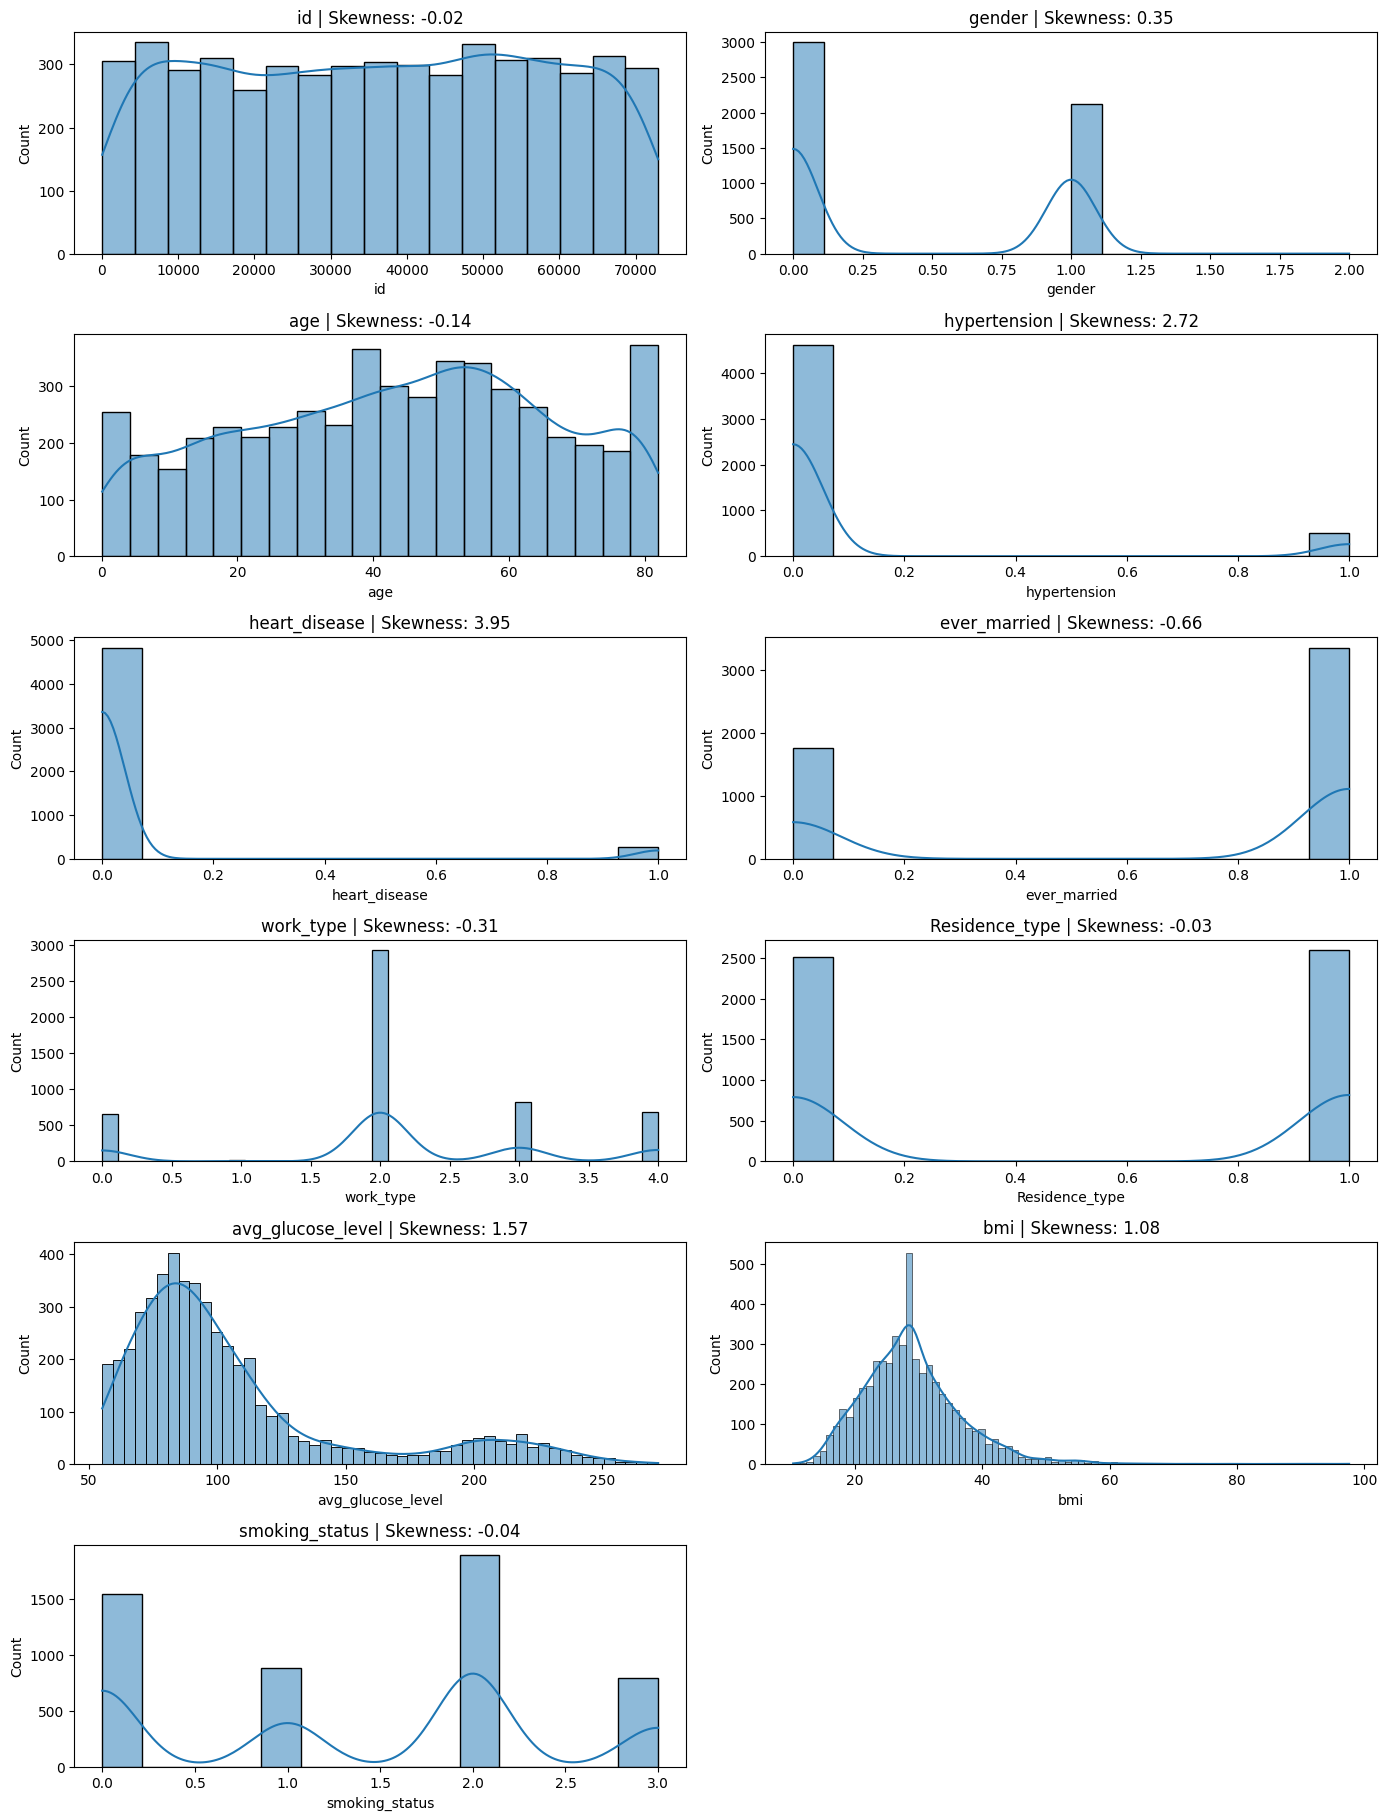

In [16]:
#all atrributes at once
numerical_columns = data.iloc[:, :-1].columns


# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))

for idx, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, idx+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

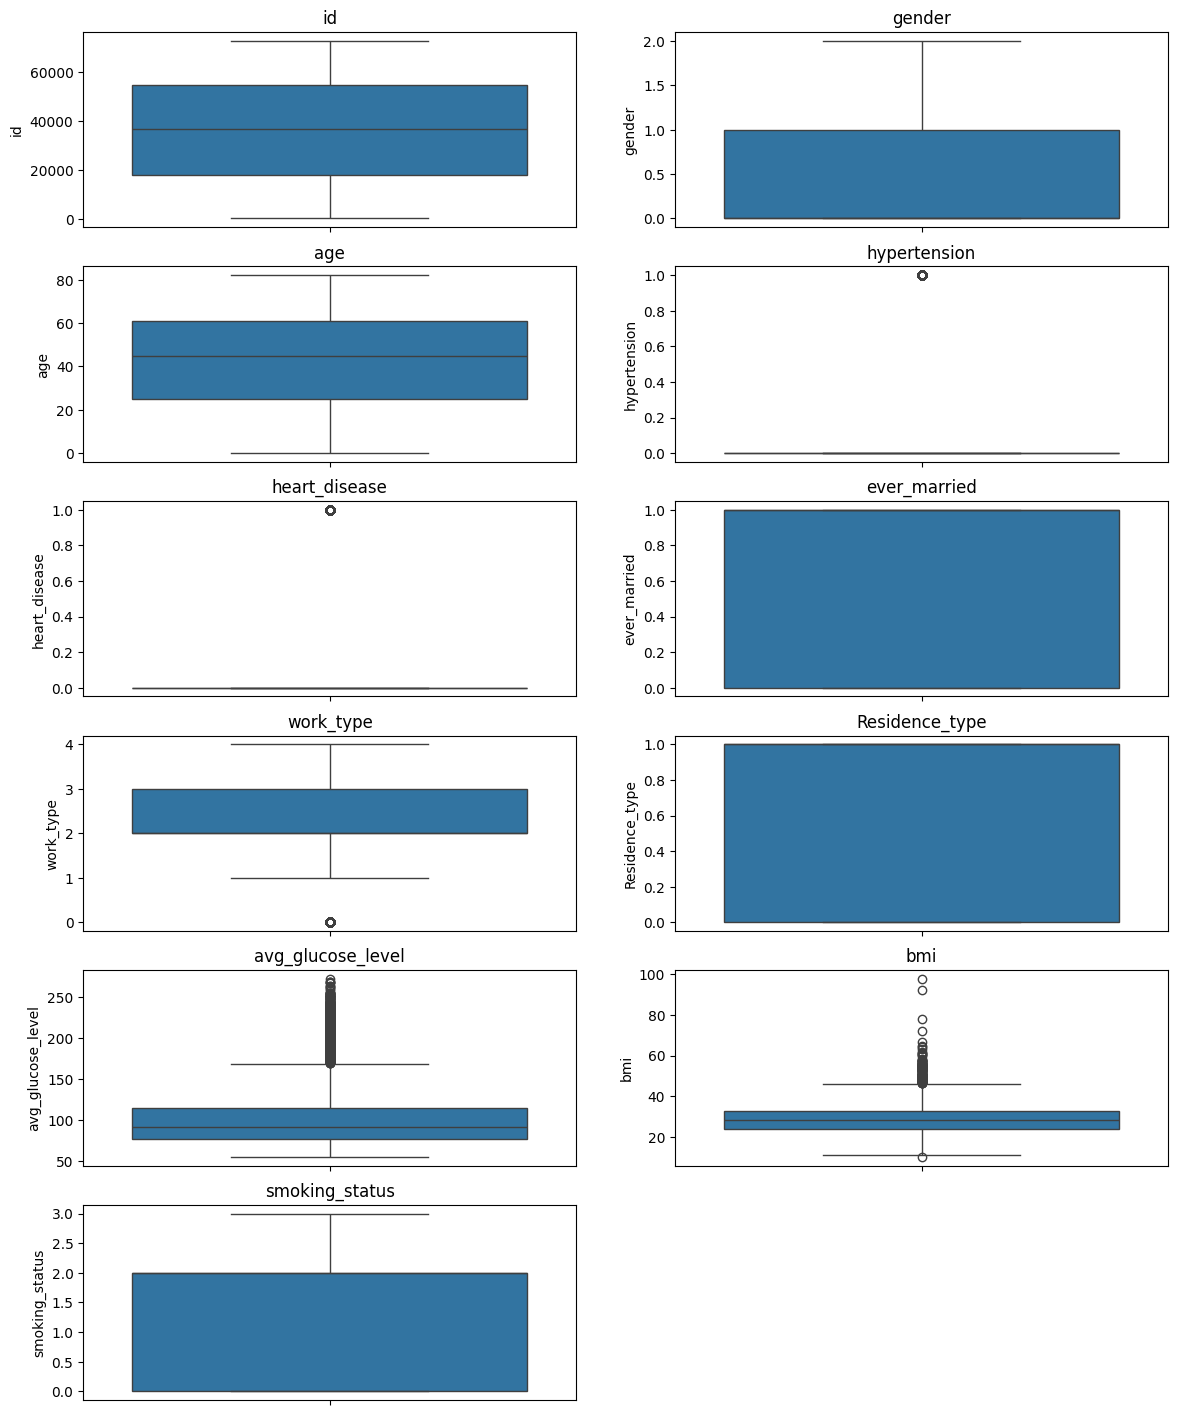

In [17]:
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, idx+1)
    sns.boxplot(data[feature])
    plt.title(f"{feature}")
plt.show()

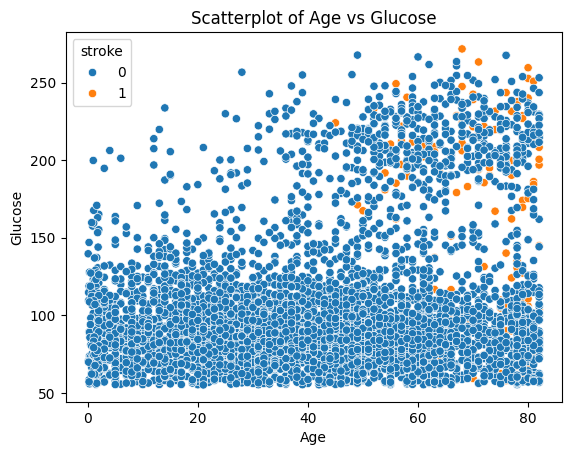

In [20]:
sns.scatterplot(x='age',y='avg_glucose_level',hue='stroke',data=data)
plt.title('Scatterplot of Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

<Figure size 1000x600 with 0 Axes>

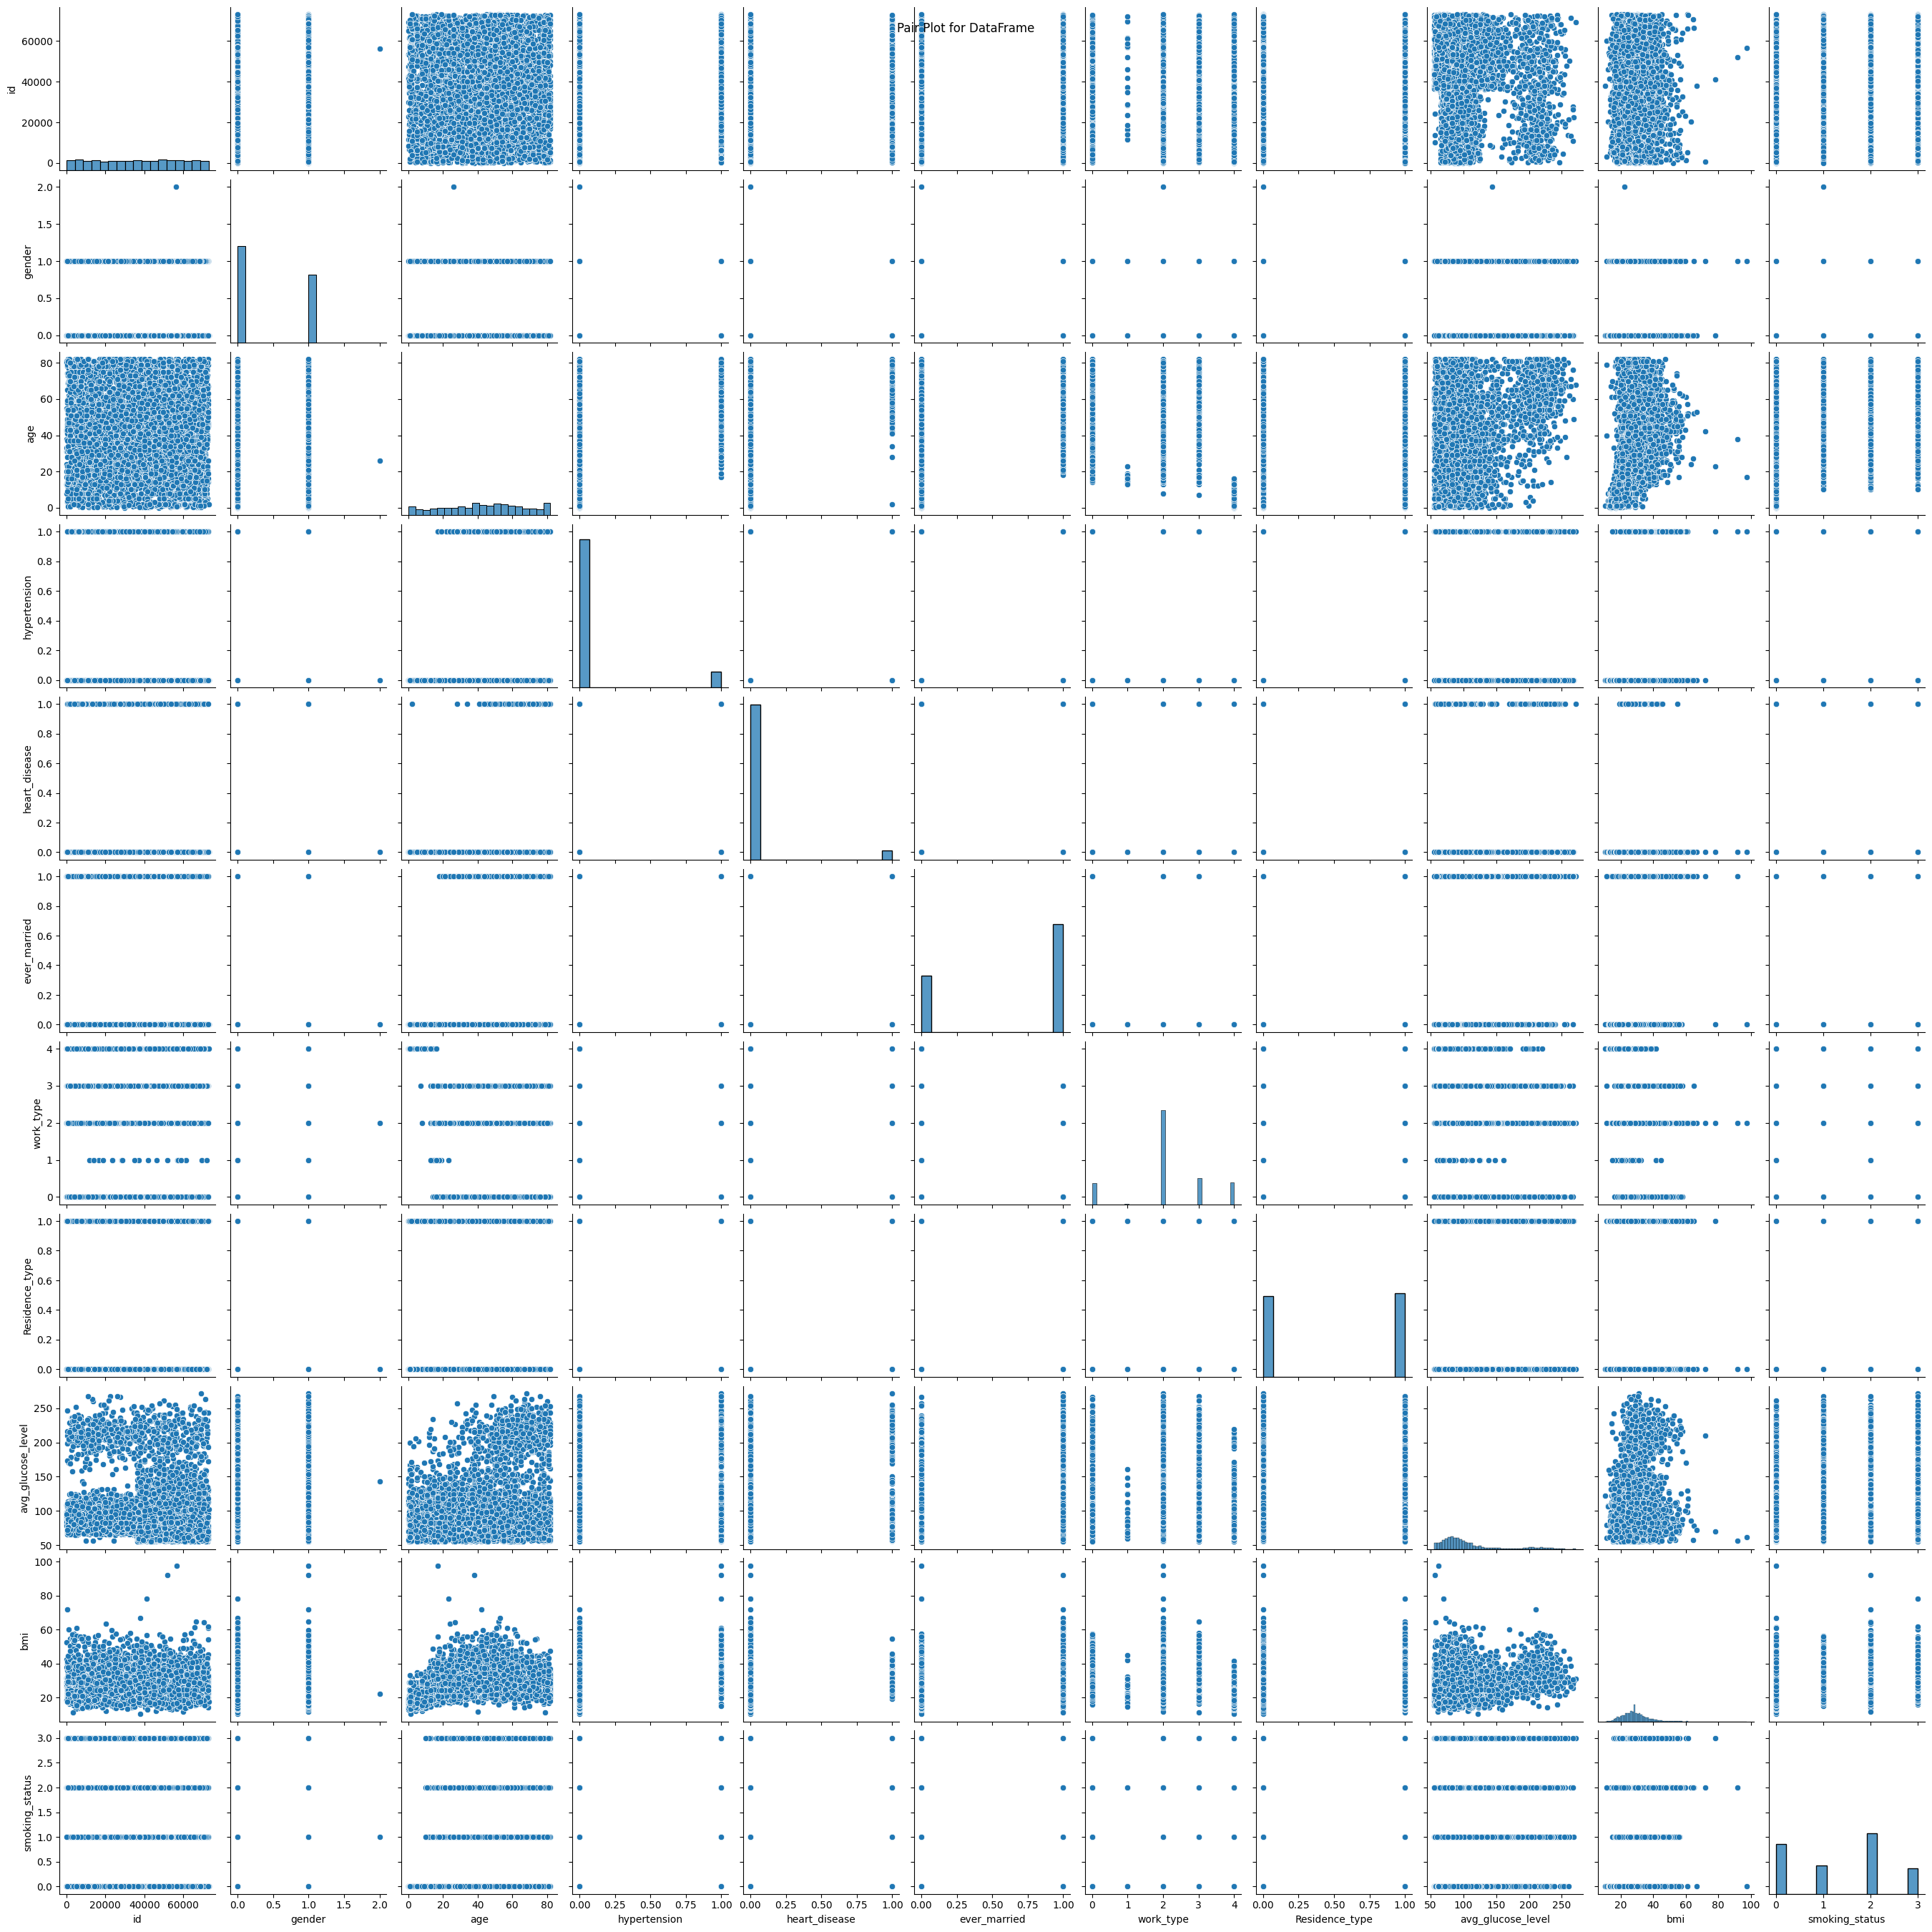

In [21]:
col=data.iloc[:,:-1]
plt.figure(figsize=(10, 6))
sns.pairplot(col)
plt.suptitle('Pair Plot for DataFrame')
plt.show()

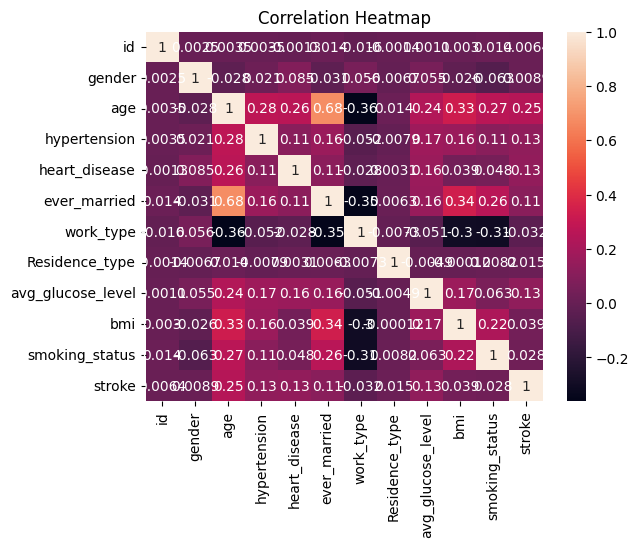

In [22]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1


<Axes: >

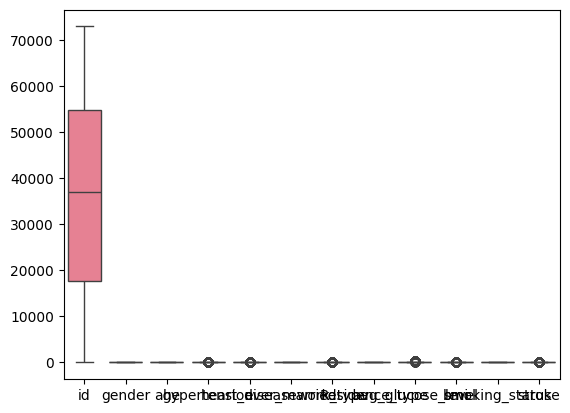

In [ ]:
sns.boxplot(data)

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [ ]:
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [ ]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_capped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'id'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'age'),
  Text(3, 0, 'hypertension'),
  Text(4, 0, 'heart_disease'),
  Text(5, 0, 'ever_married'),
  Text(6, 0, 'work_type'),
  Text(7, 0, 'Residence_type'),
  Text(8, 0, 'avg_glucose_level'),
  Text(9, 0, 'bmi'),
  Text(10, 0, 'smoking_status'),
  Text(11, 0, 'stroke')])

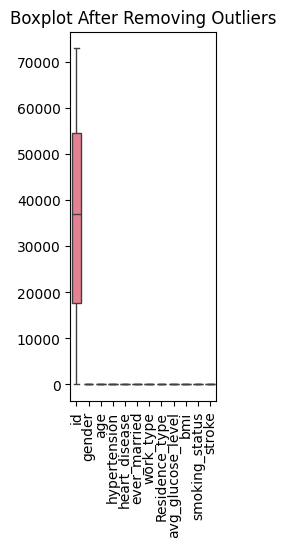

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(data=data_capped)
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)

In [ ]:

data.head(5110)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
x=data.drop('stroke',axis=1)
y=data['stroke']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3
...,...,...,...,...,...,...,...,...,...,...
4931,0,53.0,1,0,1,0,0,98.61,38.8,3
3264,0,61.0,0,0,1,2,0,72.01,26.0,1
1653,1,44.0,0,0,1,2,0,94.71,28.4,3
2607,1,21.0,0,0,0,2,1,120.94,29.7,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("accuracy",accuracy_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

accuracy 0.9452054794520548
recall 0.0
precision 0.0


array([[966,   2],
       [ 54,   0]])

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_linear = SVC(kernel='linear',C=100.0)
svc_linear.fit(X_train, y_train)

SVC(C=100.0, kernel='linear')

In [ ]:
y_pred_linear = svc_linear.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_linear)
precision = precision_score(y_test, y_pred_linear)
recall = recall_score(y_test, y_pred_linear)
fscore = f1_score(y_test, y_pred_linear)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.9471624266144814
Precision: 0.0
Recall: 0.0
F1 Score:  0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9207436399217221

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9481409001956947

In [ ]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
import pickle
pickle.dump(final_model,open('strokerandomnew.pkl','wb'))